In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def fitness(x):
    return (x)**2.0


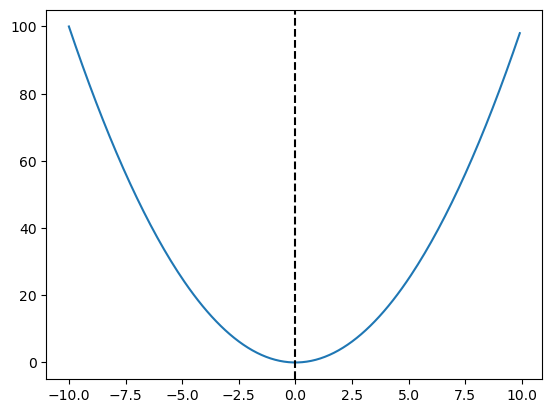

In [37]:
xMin,xMax = -10.0,10.0
inputs=np.arange(xMin,xMax,0.1)
results=fitness(inputs)
plt.plot(inputs,results)

xOptimal = 0.0
plt.axvline(x=xOptimal,ls = '--',color='k')
plt.show()

In [38]:
def simlatedAnnealing(initialT,alpha,nIter,finalT):
    temp = initialT
    currentSolution = np.random.randn()* 10
    bestSolution = currentSolution

    while temp > finalT:
        for i in range(nIter):
            neighbourSolution = currentSolution + np.random.randn()
            delta = fitness(neighbourSolution) - fitness(currentSolution)
            metropolis = np.exp(-delta/temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if fitness(currentSolution) < fitness(bestSolution):
                    bestSolution = currentSolution
                    
        temp = alpha * temp

    return bestSolution



In [39]:
def tabuSearch(neighbourhoodSize, criteria):
    initialSolution = np.random.randn()* 10
    bestSolution = initialSolution
    print("Initial Solution: ", initialSolution)

    tabuList = np.array([])
    tabuList = np.append(tabuList, initialSolution)

    while True:
        neighbours = np.zeros(neighbourhoodSize)
        for j in range(neighbourhoodSize):
            neighbours[j] = bestSolution + np.random.randn()
        
        candidateSolution = neighbours[0]
        for i in range(1,neighbourhoodSize):
            delta = fitness(neighbours[i]) - fitness(candidateSolution)
            if (neighbours[i] not in tabuList) and (delta < 0):
                candidateSolution = neighbours[i]

        bestSolution = candidateSolution
        print("Current Best Solution: ", bestSolution)
        tabuList = np.append(tabuList, candidateSolution)

        if fitness(bestSolution) < criteria:
            break
        
    return bestSolution

In [40]:
np.random.seed(999)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

best = simlatedAnnealing(initialT,alpha,nIter,finalT)
print('Returned solution:f(%s) = %f' % (best,fitness(best)))

Returned solution:f(0.0002901432728049007) = 0.000000


In [41]:
np.random.seed(55)
neighbourhoodSize = 50
criteria = 1e-10
bestSolution = tabuSearch(neighbourhoodSize, criteria)
print('Returned solution:f(%s) = %f' % (bestSolution,fitness(bestSolution)))

Initial Solution:  -16.237311146339945
Current Best Solution:  -14.57088261741697
Current Best Solution:  -11.312473685890765
Current Best Solution:  -6.525108424804983
Current Best Solution:  -4.0492256345901865
Current Best Solution:  -2.505012114109471
Current Best Solution:  -0.41193525614759663
Current Best Solution:  -0.026850522998525528
Current Best Solution:  0.021489903110498934
Current Best Solution:  -0.013704469674683
Current Best Solution:  -0.04661912990816314
Current Best Solution:  0.01732659841102062
Current Best Solution:  -0.017553429714159227
Current Best Solution:  0.0184629124805488
Current Best Solution:  -0.013352760919902756
Current Best Solution:  0.00696000952799989
Current Best Solution:  -0.021608961393773857
Current Best Solution:  -0.006777128938290496
Current Best Solution:  -0.0062703667308993735
Current Best Solution:  -0.003768328108173474
Current Best Solution:  -0.001752634381475935
Current Best Solution:  0.02389381570146567
Current Best Solution:

In [42]:
def simulatedAnnealing(initialT,alpha,nIter,finalT):
    temp = initialT
    currentSolution = np.random.randn()* 10
    bestSolution = currentSolution

    solutions = np.array([])
    solutions = np.append(solutions, currentSolution)

    temaperatures = np.array([])
    temaperatures = np.append(temaperatures, initialT)

    while temp >= finalT:
        for i in range(nIter):
            neighbourSolution = currentSolution + np.random.randn()
            delta = fitness(neighbourSolution) - fitness(currentSolution)
            metropolis = np.exp(-delta/temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if fitness(currentSolution) < fitness(bestSolution):
                    bestSolution = currentSolution
                    
        temp = alpha * temp
        solutions = np.append(solutions, currentSolution)
        temaperatures = np.append(temaperatures, temp)

    return bestSolution, solutions, temaperatures

In [43]:
np.random.seed(999)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

best, solutions, temperatures = simulatedAnnealing(initialT,alpha,nIter,finalT)
print('Returned solution:f(%s) = %f' % (best,fitness(best)))

Returned solution:f(0.0002901432728049007) = 0.000000


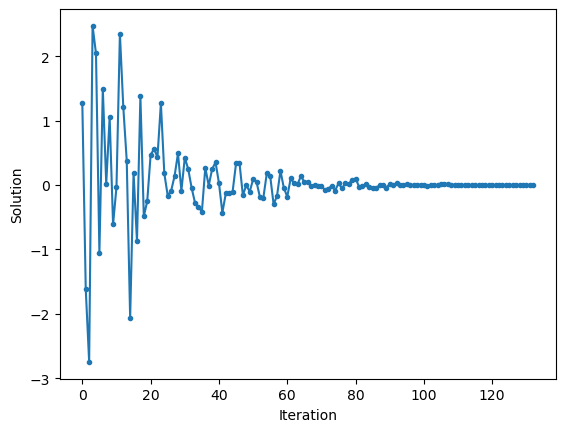

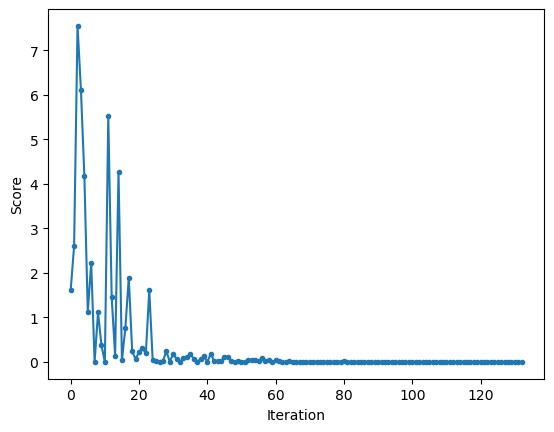

In [44]:
plt.plot(solutions,".-")
plt.xlabel('Iteration')
plt.ylabel('Solution')
plt.show()

score=fitness(solutions)
plt.plot(score,".-")
plt.xlabel('Iteration')
plt.ylabel('Score') 
plt.show() 

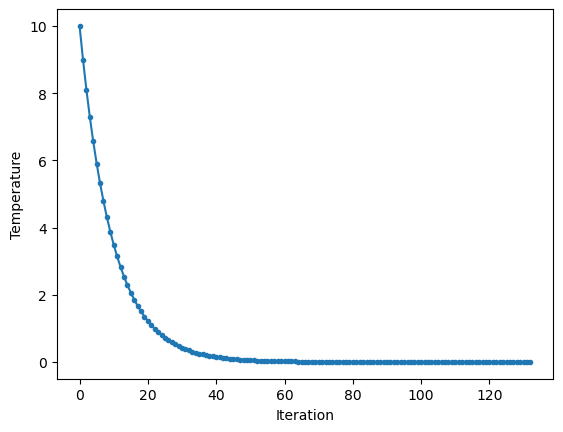

In [45]:
plt.plot(temperatures,".-")
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()

In [46]:
from matplotlib import cm

In [47]:
def eggHolder(x,y):
    return -(y+47)*np.sin(np.sqrt(np.abs(x/2 + (y+47)))) - x*np.sin(np.sqrt(np.abs(x - (y+47))))

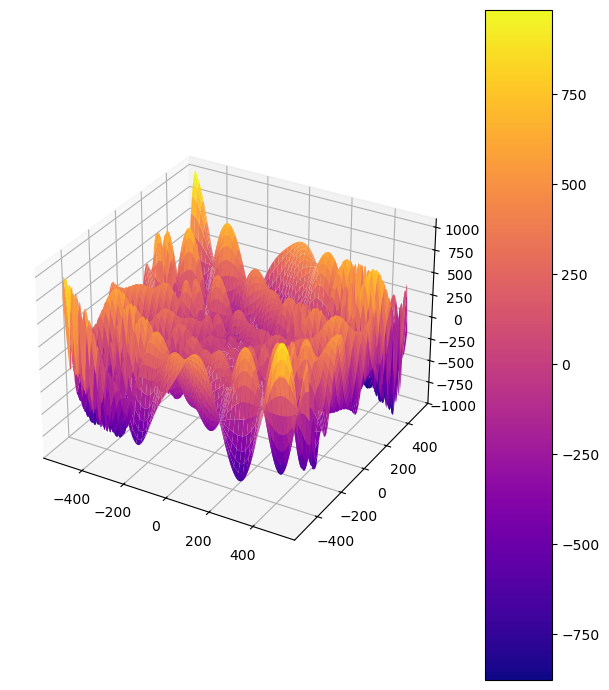

In [48]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,2,1, projection='3d')
xvalues = np.linspace(-512,512,500)
yvalues = np.linspace(-512,512,500)
xgrid, ygrid = np.meshgrid(xvalues,yvalues)
zvalues = eggHolder(xgrid, ygrid)

surf=ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, linewidth=0, cmap=cm.plasma)
fig.colorbar(surf,aspect=10)
plt.tight_layout()
plt.show()

In [68]:
def simulatedAnnealing(initialT,alpha,nIter,finalT):
    temp = initialT
    currentSolution = np.random.randn(1,2)* 256
    bestSolution = currentSolution

    solutions = currentSolution
    temperatures = np.array([])
    temperatures = np.append(temperatures, initialT)

    while temp > finalT:
        for i in range(nIter):
            neighbourSolution = currentSolution + np.random.randn()*10
            if neighbourSolution[0][0] >= -512 and neighbourSolution[0][0] <= 512:
                if neighbourSolution[0][1] >= -512 and neighbourSolution[0][1] <= 512:
                   break
            delta = eggHolder(neighbourSolution[0][0],neighbourSolution[0][1]) - eggHolder(currentSolution[0][0],currentSolution[0][1])
            metropolis = np.exp(-delta/temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if eggHolder(currentSolution[0][0],currentSolution[0][1]) < eggHolder(bestSolution[0][0],bestSolution[0][1]):
                    bestSolution = currentSolution
                    
        temp = alpha * temp

        solutions = np.append(solutions, currentSolution, axis=0)
        temperatures = np.append(temperatures, temp)

    return bestSolution,solutions, temperatures

In [ ]:
np.random.seed(458)

initialT = 1e+01
alpha = 0.5
nIter = 200
finalT = 1e-05

best, solutions, temperatures = simulatedAnnealing(initialT,alpha,nIter,finalT)
print('Returned solution:f(%s) = %f' % (best,eggHolder(best[0][0],best[0][1])))

Returned solution:f([[ -98.3212402 -142.8194205]]) = 50.239300


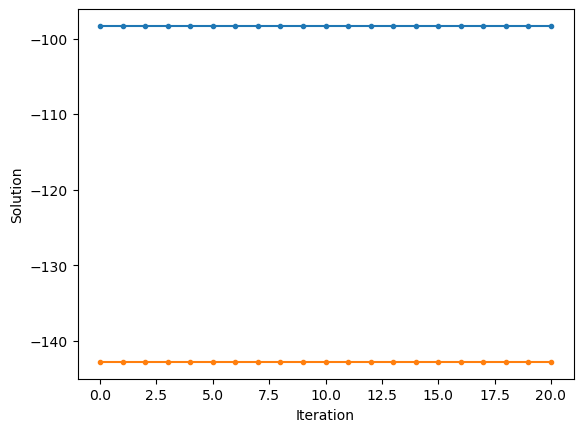

42


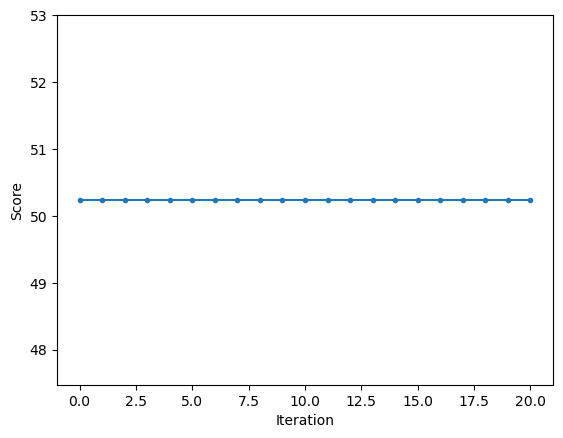

In [65]:
plt.plot(solutions,".-")
plt.xlabel('Iteration')
plt.ylabel('Solution')
plt.show()

print(np.size(solutions))
scores = eggHolder(solutions[:,0],solutions[:,1])
plt.plot(scores,".-")
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.show()

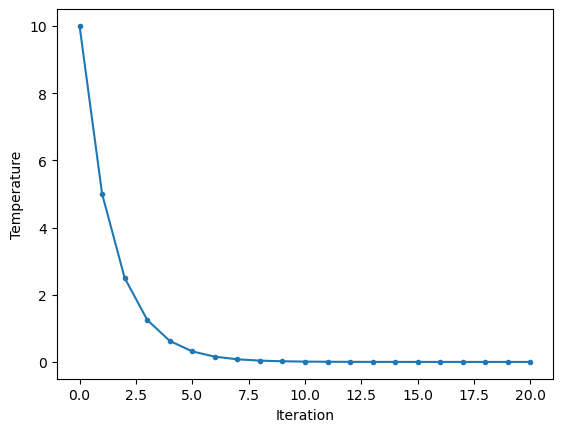

In [62]:
plt.plot(temperatures,".-")
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()